<a href="https://colab.research.google.com/github/federico-bassi/EtricsIII/blob/main/Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometrics III - Assignment 2 - Part 3

## Input

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ardl import ARDL
from statsmodels.tsa.stattools import adfuller
from google.colab import drive
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import coint

drive.mount('/content/drive')
np.random.seed(1234)

Mounted at /content/drive


In [ ]:
who_are_you = 0
if who_are_you == 0:
  path = "/content/drive/MyDrive/EtricsIII_Ass2"
else:
  path = "..."

In [ ]:
#Load in data
data = pd.read_csv(path+"/Data/data_assign_p3.csv")

In [ ]:
data.head()

,DATE,APPLE,EXXON_MOBIL,FORD,GEN_ELECTRIC,INTEL,MICROSOFT,NETFLIX,NOKIA,SP500,YAHOO
0,13/02/2007,84.630001,75.190002,8.45,35.930000,20.959999,29.170000,22.900000,22.910000,1443.910034,29.690001
1,14/02/2007,85.440000,75.260002,8.55,36.360001,21.209999,29.580000,22.480000,22.950001,1455.150024,30.820000
2,15/02/2007,85.250002,74.900002,8.54,36.070000,21.260000,28.910000,22.520000,23.030001,1456.770020,31.000000
3,19/02/2007,84.650002,74.720001,8.56,35.860001,21.059999,28.629999,22.950000,22.799999,1455.530029,31.799999
4,20/02/2007,85.979999,74.620003,8.67,35.990002,20.969999,28.750000,23.519999,22.840000,1459.599976,31.740000


## Point 1

In [ ]:
#Set up similation by choosing parameters and sample sizes
sigma2u = 2
sigma2v = 3
sample_sizes = [500, 1000, 5000]
num_simulations = 500
beta = {}
frac = {}
r_squared = {}

for sample_size in sample_sizes:
    beta[sample_size] = []
    frac[sample_size] = []
    r_squared[sample_size] = []

#Generate data and run regressions
for sample_size in sample_sizes:
    for sim in range(num_simulations):
        u = np.random.normal(0, sigma2u, sample_size)
        v = np.random.normal(0, sigma2v, sample_size)
        Y = np.zeros(sample_size)
        X = np.zeros(sample_size)
        for i in range(1, sample_size):
            Y[i] = Y[i-1] + u[i]
            X[i] = X[i-1] + v[i]
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Y, X)
        beta[sample_size].append(slope)
        frac[sample_size].append(slope / std_err)
        r_squared[sample_size].append(r_value**2)

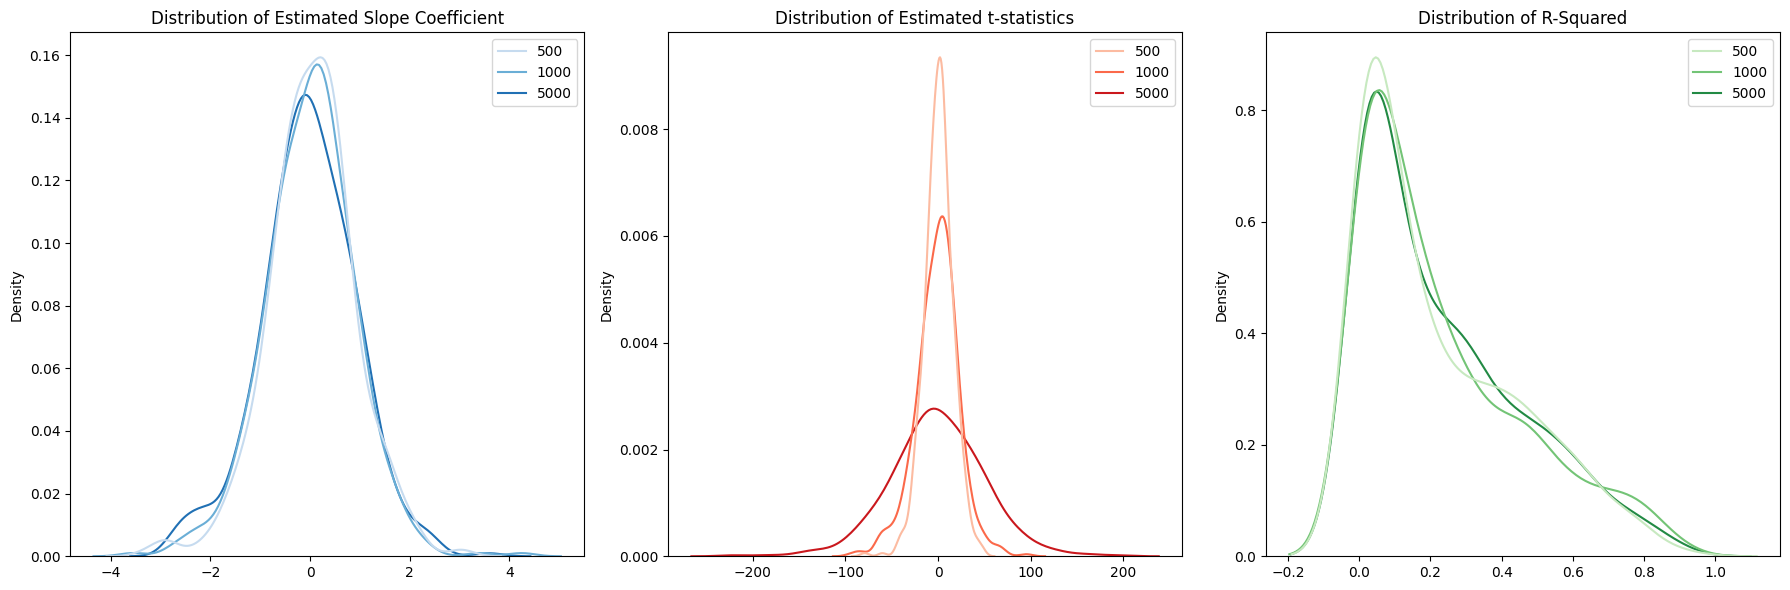

In [ ]:
# Plot distributions for slope coefficient
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.kdeplot(data=beta, palette='Blues', ax=axes[0])
axes[0].set_title('Distribution of Estimated Slope Coefficient')

# Plot distributions for frac
sns.kdeplot(data=frac, palette='Reds', ax=axes[1])
axes[1].set_title('Distribution of Estimated t-statistics')

# Plot distributions for r squared
sns.kdeplot(data=r_squared, palette='Greens', ax=axes[2])
axes[2].set_title('Distribution of R-Squared')

plt.tight_layout()
plt.savefig(path+"/Figures/part3_monte_carlo")
plt.show()

## Point 2

In [ ]:
data.head()

,DATE,APPLE,EXXON_MOBIL,FORD,GEN_ELECTRIC,INTEL,MICROSOFT,NETFLIX,NOKIA,SP500,YAHOO
0,2007-02-13,84.630001,75.190002,8.45,35.930000,20.959999,29.170000,22.900000,22.910000,1443.910034,29.690001
1,2007-02-14,85.440000,75.260002,8.55,36.360001,21.209999,29.580000,22.480000,22.950001,1455.150024,30.820000
2,2007-02-15,85.250002,74.900002,8.54,36.070000,21.260000,28.910000,22.520000,23.030001,1456.770020,31.000000
3,2007-02-19,84.650002,74.720001,8.56,35.860001,21.059999,28.629999,22.950000,22.799999,1455.530029,31.799999
4,2007-02-20,85.979999,74.620003,8.67,35.990002,20.969999,28.750000,23.519999,22.840000,1459.599976,31.740000


In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])

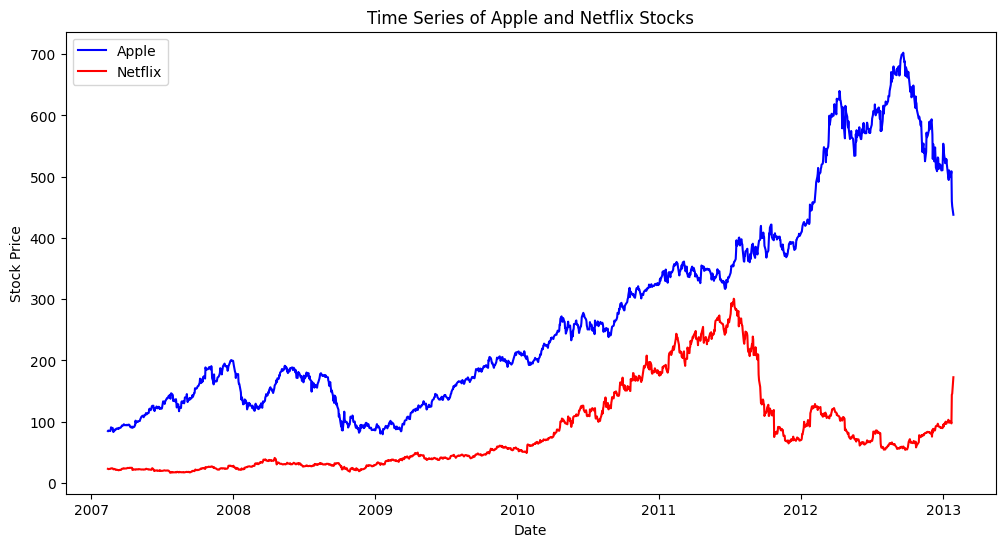

In [ ]:
#Plot Apple and Netflix time series
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['APPLE'], label='Apple', color='blue')
plt.plot(data['DATE'], data['NETFLIX'], label='Netflix', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Time Series of Apple and Netflix Stocks')
plt.legend()
plt.savefig(path+"part3_times_series")
plt.show()

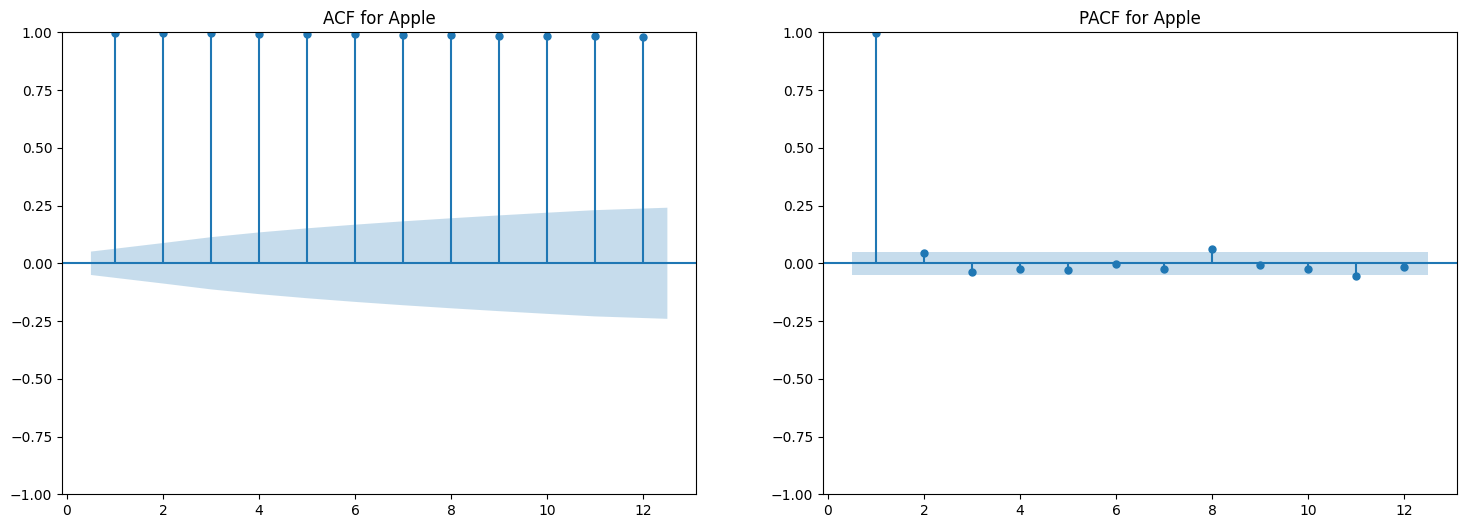

In [ ]:
#Plot ACF and PACF Apple series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
plot_acf(data['APPLE'], lags=12, ax=ax1, title='ACF for Apple', zero=False)
plot_pacf(data['APPLE'], lags=12, ax=ax2, title='PACF for Apple', zero=False)
plt.savefig(path + "/Figures/part3_acf_apple.png")
plt.show()

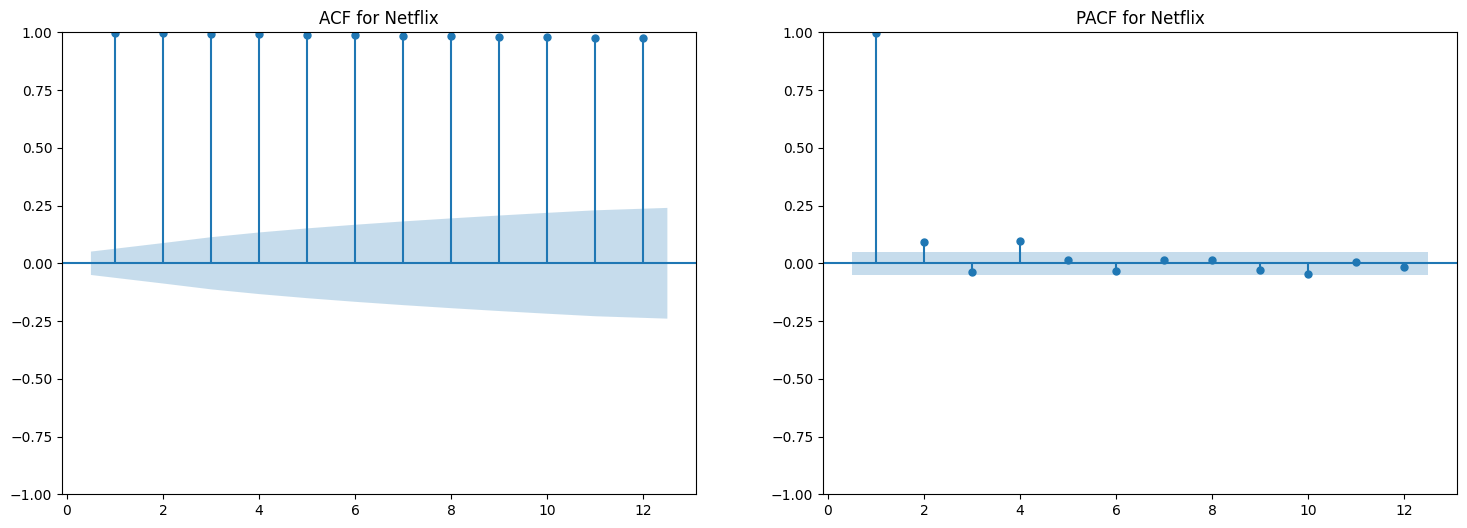

In [ ]:
#Plot ACF and PACF Netflix series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
plot_acf(data['NETFLIX'], lags=12, ax=ax1, title='ACF for Netflix', zero=False)
plot_pacf(data['NETFLIX'], lags=12, ax=ax2, title='PACF for Netflix', zero=False)
plt.savefig(path + "/Figures/part3_acf_netflix.png")
plt.show()

## Point 3

In [ ]:
data.head()

,DATE,APPLE,EXXON_MOBIL,FORD,GEN_ELECTRIC,INTEL,MICROSOFT,NETFLIX,NOKIA,SP500,YAHOO
0,13/02/2007,84.630001,75.190002,8.45,35.930000,20.959999,29.170000,22.900000,22.910000,1443.910034,29.690001
1,14/02/2007,85.440000,75.260002,8.55,36.360001,21.209999,29.580000,22.480000,22.950001,1455.150024,30.820000
2,15/02/2007,85.250002,74.900002,8.54,36.070000,21.260000,28.910000,22.520000,23.030001,1456.770020,31.000000
3,19/02/2007,84.650002,74.720001,8.56,35.860001,21.059999,28.629999,22.950000,22.799999,1455.530029,31.799999
4,20/02/2007,85.979999,74.620003,8.67,35.990002,20.969999,28.750000,23.519999,22.840000,1459.599976,31.740000


In [ ]:
#Run ADF tests for all stock series
test_stat = {}
for col in data.columns:
  print(col)
  if col == "DATE":
    continue
  results = adfuller(data[col], regression="ct", autolag="BIC")
  test_stat[col] = results[0]
  print(results[2])

DATE
APPLE
1
EXXON_MOBIL
2
FORD
0
GEN_ELECTRIC
1
INTEL
0
MICROSOFT
0
NETFLIX
0
NOKIA
0
SP500
1
YAHOO
1


In [ ]:
df = pd.DataFrame(test_stat.items(), columns=['Time Series', 'DF Test Statistic'])

In [ ]:
df

,Time Series,DF Test Statistic
0,APPLE,-1.465294
1,EXXON_MOBIL,-1.989286
2,FORD,-1.813343
3,GEN_ELECTRIC,-1.002319
4,INTEL,-2.290601
5,MICROSOFT,-2.442003
6,NETFLIX,-1.453608
7,NOKIA,-2.340686
8,SP500,-1.411268
9,YAHOO,-2.311900


In [ ]:
with open(path+"/Tables/part3_adf.tex", 'w') as f:
    f.write(df.to_latex(index=False))

In [ ]:
critical_values = pd.DataFrame(adfuller(data["APPLE"], regression="ct", autolag="BIC")[4].items(),columns=['Significance Level', 'Critical Value'])

In [ ]:
critical_values

,Significance Level,Critical Value
0,1%,-3.964830
1,5%,-3.413427
2,10%,-3.128779


In [ ]:
with open(path+"/Tables/part3_adf_critical_values.tex", 'w') as f:
    f.write(critical_values.to_latex(index=False, escape=True))

## Point 4

In [ ]:
companies = ["APPLE", "MICROSOFT"]

In [ ]:
#Create a string of new dates
start_date = datetime(2013, 1, 28)
date_list = []
date_list.append(start_date.strftime("%d/%m/%Y"))
for i in range(1, 5):
    next_date = start_date + timedelta(days=i)
    date_list.append(next_date.strftime("%d/%m/%Y"))

<ipython-input-63-c6440a4b24ee>:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.DataFrame({"DATE": pd.to_datetime(date_list), "Forecast": [x_T for i in range(5)], "Lower Bound": confidence_intervals_lower, "Upper Bound": confidence_intervals_upper})


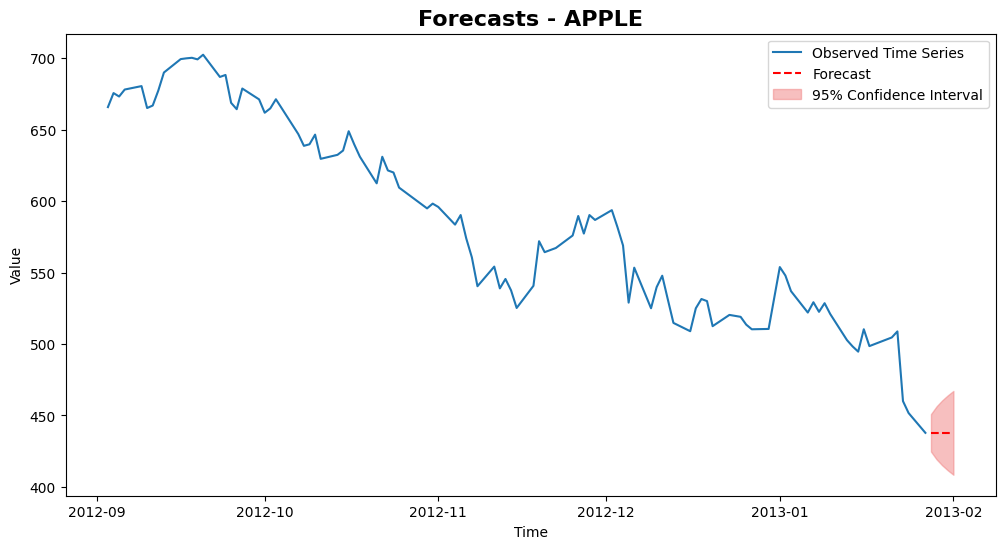

<ipython-input-63-c6440a4b24ee>:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.DataFrame({"DATE": pd.to_datetime(date_list), "Forecast": [x_T for i in range(5)], "Lower Bound": confidence_intervals_lower, "Upper Bound": confidence_intervals_upper})


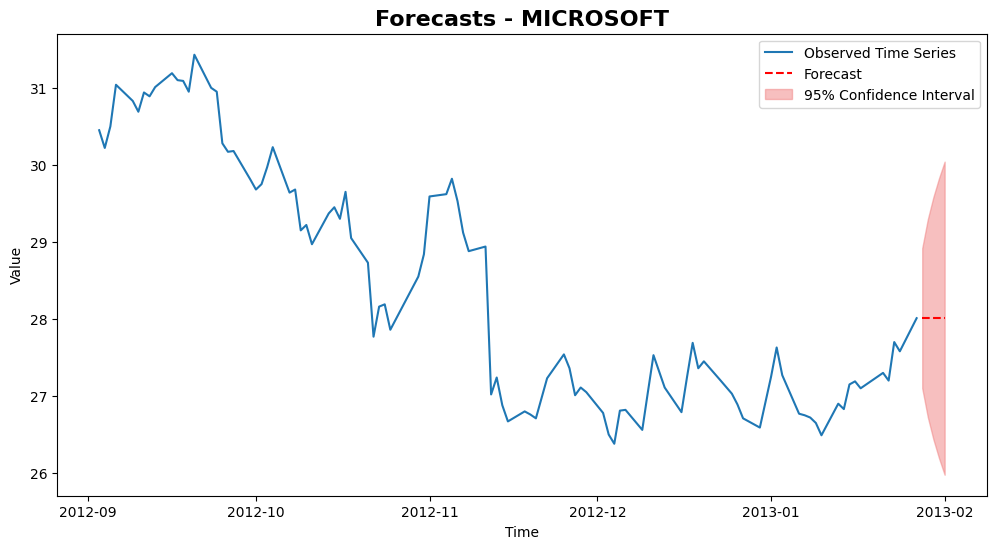

In [ ]:
for company in companies:
  #Retrieve last observed value
  x_T = data[company].values[-1]
  #Compute sigma2 from AR(1)
  ar_1_result = sm.tsa.AutoReg(data[company], 1).fit()
  residuals = ar_1_result.resid
  std = np.std(residuals)

  #Compute confidence interval
  confidence_intervals_lower = [x_T - 1.96 * np.sqrt(i)*std for i in range(1,6)]
  confidence_intervals_upper = [x_T + 1.96 * np.sqrt(i)*std for i in range(1,6)]

  #Put everything in a dataframe
  df = pd.DataFrame({"DATE": pd.to_datetime(date_list), "Forecast": [x_T for i in range(5)], "Lower Bound": confidence_intervals_lower, "Upper Bound": confidence_intervals_upper})
  with open(path+f"/Tables/part3_forecasts_{company}.tex", 'w') as f:
    f.write(df.to_latex(index=False))

  #Plot forecasts and confidence intervals
  plt.figure(figsize=(12, 6))
  plt.plot(data[data['DATE'] >= '2012-09-01']['DATE'], data[data['DATE'] >= '2012-09-01'][company], label='Observed Time Series')
  plt.plot(df["DATE"], df["Forecast"], color='red', linestyle='--', label='Forecast')  # Dotted line
  plt.fill_between(df["DATE"], df["Lower Bound"], df["Upper Bound"], color='lightcoral', alpha=0.5, label='95% Confidence Interval')  # Light red
  plt.title(f'Forecasts - {company}', fontsize=16, fontweight='bold')
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.legend()
  plt.savefig(path+f"/Figures/part3_forecasts_{company}.png")
  plt.show()

## Point 5

In [ ]:
x_T = data[["MICROSOFT"]]

#Take first differences Microsoft
x_T_first_diff_Microsoft = x_T.diff().dropna()


x_T = data[["EXXON_MOBIL"]]

#Take first differences EXXON_MOBIL
x_T_first_diff_EXXON_MOBIL = x_T.diff().dropna()

In [ ]:
#Run ADF tests for differenced data
test_stat = {}
companies = {"Microsoft", "EXXON_MOBIL"}

for company in companies:
    if company == "Microsoft":
        x_T_first_diff_company = x_T_first_diff_Microsoft
    elif company == "EXXON_MOBIL":
        x_T_first_diff_company = x_T_first_diff_EXXON_MOBIL

    results = adfuller(x_T_first_diff_company, regression="ct", autolag="BIC")
    test_stat[company] = results[0]

df = pd.DataFrame(test_stat.items(), columns=['Time Series', 'DF Test Statistic'])

In [ ]:
with open(path+"/Tables/part3.5_adf.tex", 'w') as f:
    f.write(df.to_latex(index=False))

In [ ]:
#Cointegration with first differenced series
result = coint(data["MICROSOFT"], data["EXXON_MOBIL"], trend='ct', autolag="BIC")
result

(-2.3520958124460716,
 0.6012577442036426,
 array([-4.33794211, -3.78692425, -3.50104066]))

In [ ]:
#ADL(4,4), G2S:
adl = ARDL(endog=x_T_first_diff_Microsoft, lags=4, exog=x_T_first_diff_EXXON_MOBIL, order=4, trend='ct')
adl_result = adl.fit()
print(adl_result.summary())

                              ARDL Model Results                              
Dep. Variable:              MICROSOFT   No. Observations:                 1498
Model:                     ARDL(4, 4)   Log Likelihood                -721.364
Method:               Conditional MLE   S.D. of innovations              0.392
Date:                Wed, 10 Apr 2024   AIC                           1466.728
Time:                        21:44:37   BIC                           1530.439
Sample:                             4   HQIC                          1490.467
                                 1498                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0043      0.020     -0.211      0.833      -0.044       0.036
trend           1.851e-06   2.36e-05      0.078      0.938   -4.45e-05    4.82e-05
MICROSOFT.L1       0.0073      0.026

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#ADL(3,4), G2S:
adl = ARDL(endog=x_T_first_diff_Microsoft, lags=3, exog=x_T_first_diff_EXXON_MOBIL, order=4, trend='ct')
adl_result = adl.fit()
print(adl_result.summary())

                              ARDL Model Results                              
Dep. Variable:              MICROSOFT   No. Observations:                 1498
Model:                     ARDL(3, 4)   Log Likelihood                -721.348
Method:               Conditional MLE   S.D. of innovations              0.392
Date:                Wed, 10 Apr 2024   AIC                           1464.697
Time:                        21:45:00   BIC                           1523.105
Sample:                             4   HQIC                          1486.460
                                 1498                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0043      0.020     -0.211      0.833      -0.044       0.036
trend            1.86e-06   2.36e-05      0.079      0.937   -4.45e-05    4.82e-05
MICROSOFT.L1       0.0072      0.026

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#ADL(3,4), G2S:
adl = ARDL(endog=x_T_first_diff_Microsoft, lags=[1,3], exog=x_T_first_diff_EXXON_MOBIL, order=4, trend='ct')
adl_result = adl.fit()
print(adl_result.summary())

                              ARDL Model Results                              
Dep. Variable:              MICROSOFT   No. Observations:                 1498
Model:                     ARDL(3, 4)   Log Likelihood                -721.360
Method:               Conditional MLE   S.D. of innovations              0.392
Date:                Wed, 10 Apr 2024   AIC                           1462.720
Time:                        21:45:20   BIC                           1515.819
Sample:                             4   HQIC                          1482.505
                                 1498                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0043      0.020     -0.211      0.833      -0.044       0.036
trend           1.856e-06   2.36e-05      0.079      0.937   -4.44e-05    4.82e-05
MICROSOFT.L1       0.0072      0.026

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#ADL(3,4), G2S:
adl = ARDL(endog=x_T_first_diff_Microsoft, lags=[1,3], exog=x_T_first_diff_EXXON_MOBIL, order=[0,1,3,4], trend='ct')
adl_result = adl.fit()
print(adl_result.summary())

                              ARDL Model Results                              
Dep. Variable:              MICROSOFT   No. Observations:                 1498
Model:                     ARDL(3, 4)   Log Likelihood                -721.373
Method:               Conditional MLE   S.D. of innovations              0.392
Date:                Wed, 10 Apr 2024   AIC                           1460.746
Time:                        21:45:39   BIC                           1508.535
Sample:                             4   HQIC                          1478.552
                                 1498                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0043      0.020     -0.210      0.833      -0.044       0.036
trend           1.814e-06   2.36e-05      0.077      0.939   -4.45e-05    4.81e-05
MICROSOFT.L1       0.0051      0.022

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#ADL(3,4), G2S:
adl = ARDL(endog=x_T_first_diff_Microsoft, lags=[3], exog=x_T_first_diff_EXXON_MOBIL, order=[0,1,3,4], trend='ct')
adl_result = adl.fit()
print(adl_result.summary())

                              ARDL Model Results                              
Dep. Variable:              MICROSOFT   No. Observations:                 1498
Model:                     ARDL(3, 4)   Log Likelihood                -721.399
Method:               Conditional MLE   S.D. of innovations              0.392
Date:                Wed, 10 Apr 2024   AIC                           1458.799
Time:                        21:45:49   BIC                           1501.278
Sample:                             4   HQIC                          1474.627
                                 1498                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0043      0.020     -0.212      0.832      -0.044       0.036
trend           1.854e-06   2.36e-05      0.079      0.937   -4.44e-05    4.81e-05
MICROSOFT.L3      -0.0704      0.026

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#ADL(3,4), G2S:
adl = ARDL(endog=x_T_first_diff_Microsoft, lags=[3], exog=x_T_first_diff_EXXON_MOBIL, order=[1,3,4], trend='ct')
adl_result = adl.fit()
print(adl_result.summary())

                              ARDL Model Results                              
Dep. Variable:              MICROSOFT   No. Observations:                 1498
Model:                     ARDL(3, 4)   Log Likelihood                -721.624
Method:               Conditional MLE   S.D. of innovations              0.392
Date:                Wed, 10 Apr 2024   AIC                           1457.249
Time:                        21:46:09   BIC                           1494.418
Sample:                             4   HQIC                          1471.098
                                 1498                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0044      0.020     -0.214      0.830      -0.044       0.036
trend           2.004e-06   2.36e-05      0.085      0.932   -4.42e-05    4.83e-05
MICROSOFT.L3      -0.0707      0.026

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#ADL(3,4), G2S:
adl = ARDL(endog=x_T_first_diff_Microsoft, lags=[3], exog=x_T_first_diff_EXXON_MOBIL, order=[1,4], trend='ct')
adl_result = adl.fit()
print(adl_result.summary())

                              ARDL Model Results                              
Dep. Variable:              MICROSOFT   No. Observations:                 1498
Model:                     ARDL(3, 4)   Log Likelihood                -722.722
Method:               Conditional MLE   S.D. of innovations              0.392
Date:                Wed, 10 Apr 2024   AIC                           1457.445
Time:                        21:46:23   BIC                           1489.304
Sample:                             4   HQIC                          1469.315
                                 1498                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0042      0.020     -0.208      0.835      -0.044       0.036
trend            1.63e-06   2.36e-05      0.069      0.945   -4.46e-05    4.79e-05
MICROSOFT.L3      -0.0716      0.026

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#Export the results for AR on Latex
res_ar = summary_col([adl_result],stars=True,float_format='%0.2f')
f = open('/content/drive/MyDrive/EtricsIII_Ass2/Tables/3.5ADL.tex', 'w')
f.write(res_ar.as_latex())
f.close()